In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive/SDN/SomePrograms/SDN_PyQt5/ryu_controller')
sys.path.append('/content/gdrive/My Drive/SDN/SomePrograms/SDN_PyQt5/topo_mininet')

import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 14}
matplotlib.rc('font', **font)

from GA_static import GA
from AS_static import AS
from ACS_static import ACS
from BFA_static import BFA
from ABC_static import ABC
from FA_static import FA


from YenAlgorithm import YenAlgorithm
from get_metric import getMetric

Times = 100
src = 1
dst = 20

N = 10
Max = 100
K = 4

Pc = 0.7
Pm = 0.7
Ts = 2

p = 0.1
a = 1
b = 2
q0 = 0.5
Q = 1

w = 0.7
c1 = 2
c2 = 2

limit = 20

y = 1
a0 = 1
b0 = 1

# weight_map = getMetric('../topo_mininet/20_nodes.json')
weight_map = getMetric('/content/gdrive/My Drive/SDN/SomePrograms/SDN_PyQt5/topo_mininet/20_nodes.json')
alg_yen = YenAlgorithm(weight_map, src, dst, K)
paths_yen, paths_edges_yen, pw_yen = alg_yen.compute_shortest_paths()
paths_yen, paths_edges_yen, pw_yen

Mounted at /content/gdrive


([[1, 6, 7, 8, 9, 20],
  [1, 2, 10, 11, 12, 5, 20],
  [1, 16, 13, 14, 8, 9, 20],
  [1, 16, 13, 14, 15, 19, 20]],
 [[(1, 6), (6, 7), (7, 8), (8, 9), (9, 20)],
  [(1, 2), (2, 10), (10, 11), (11, 12), (12, 5), (5, 20)],
  [(1, 16), (16, 13), (13, 14), (14, 8), (8, 9), (9, 20)],
  [(1, 16), (16, 13), (13, 14), (14, 15), (15, 19), (19, 20)]],
 [7.8, 8.3, 8.4, 8.9])

In [2]:
sum(pw_yen)

33.4

In [3]:
number_success_1 = np.zeros(K)
number_success_2 = np.zeros(K)
number_success_3 = np.zeros(K)
number_success_4 = np.zeros(K)
number_success_5 = np.zeros(K)
number_success_6 = np.zeros(K)
sum_1 = []
sum_2 = []
sum_3 = []
sum_4 = []
sum_5 = []
sum_6 = []
time_1 = []
time_2 = []
time_3 = []
time_4 = []
time_5 = []
time_6 = []

In [4]:
number_success_1 = np.zeros(K)
sum_1 = []
time_1 = []
for i in range(Times):
    paths_alg, paths_edges_alg, pw_alg, start, end = [], [], [], None, None
    alg = ABC(weight_map, src, dst, K, N, Max, limit)
    while len(pw_alg) != K:
        start = time.time()
        paths_alg, paths_edges_alg, pw_alg = alg.compute_shortest_paths()
        end = time.time()
    time_1.append(end - start)
    sum_1.append(sum(pw_alg))
    for j1 in range(K):
        for item in pw_alg:
            if pw_yen[j1] == item:
                pw_alg.remove(item)
                number_success_1[j1] += 1
                break

In [5]:
number_success_2 = np.zeros(K)
sum_2 = []
time_2 = []
for i in range(Times):
    paths_alg, paths_edges_alg, pw_alg, start, end = [], [], [], None, None
    alg = ACS(weight_map, src, dst, K, N, Max, p, a, b, q0, Q)
    while len(pw_alg) != K:
        start = time.time()
        paths_alg, paths_edges_alg, pw_alg = alg.compute_shortest_paths()
        end = time.time()
    time_2.append(end - start)
    sum_2.append(sum(pw_alg))
    for j1 in range(K):
        for item in pw_alg:
            if pw_yen[j1] == item:
                pw_alg.remove(item)
                number_success_2[j1] += 1
                break

In [6]:
number_success_3 = np.zeros(K)
sum_3 = []
time_3 = []
for i in range(Times):
    paths_alg, paths_edges_alg, pw_alg, start, end = [], [], [], None, None
    alg = AS(weight_map, src, dst, K, N, Max, p, a, b, q0, Q)
    while len(pw_alg) != K:
        start = time.time()
        paths_alg, paths_edges_alg, pw_alg = alg.compute_shortest_paths()
        end = time.time()
    time_3.append(end - start)
    sum_3.append(sum(pw_alg))
    for j1 in range(K):
        for item in pw_alg:
            if pw_yen[j1] == item:
                pw_alg.remove(item)
                number_success_3[j1] += 1
                break

In [7]:
number_success_4 = np.zeros(K)
sum_4 = []
time_4 = []
for i in range(Times):
    paths_alg, paths_edges_alg, pw_alg, start, end = [], [], [], None, None
    alg = BFA(weight_map, src, dst, K, N, Max, w, c1, c2)
    while len(pw_alg) != K:
        start = time.time()
        paths_alg, paths_edges_alg, pw_alg = alg.compute_shortest_paths()
        end = time.time()
    time_4.append(end - start)
    sum_4.append(sum(pw_alg))
    for j1 in range(K):
        for item in pw_alg:
            if pw_yen[j1] == item:
                pw_alg.remove(item)
                number_success_4[j1] += 1
                break

In [17]:
number_success_5 = np.zeros(K)
sum_5 = []
time_5 = []
for i in range(Times):
    paths_alg, paths_edges_alg, pw_alg, start, end = [], [], [], None, None
    alg = FA(weight_map, src, dst, K, N, Max, y, a0, b0, modify=True)
    while len(pw_alg) != K:
        start = time.time()
        paths_alg, paths_edges_alg, pw_alg = alg.compute_shortest_paths()
        end = time.time()
    time_5.append(end - start)
    sum_5.append(sum(pw_alg))
    for j1 in range(K):
        for item in pw_alg:
            if pw_yen[j1] == item:
                pw_alg.remove(item)
                number_success_5[j1] += 1
                break

In [9]:
number_success_6 = np.zeros(K)
sum_6 = []
time_6 = []
for i in range(Times):
    paths_alg, paths_edges_alg, pw_alg, start, end = [], [], [], None, None
    alg = GA(weight_map, src, dst, K, N, Max, Pc, Pm, Ts)
    while len(pw_alg) != K:
        start = time.time()
        paths_alg, paths_edges_alg, pw_alg = alg.compute_shortest_paths()
        end = time.time()
    time_6.append(end - start)
    sum_6.append(sum(pw_alg))
    for j1 in range(K):
        for item in pw_alg:
            if pw_yen[j1] == item:
                pw_alg.remove(item)
                number_success_6[j1] += 1
                break

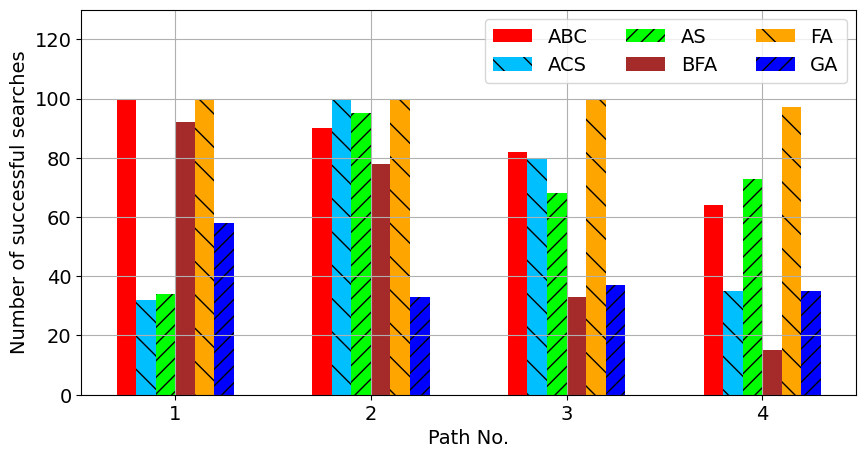

In [21]:
x = np.arange(K)+1
width = 0.1
fig = plt.figure(figsize=(10, 5))
plt.xticks(x)
plt.ylim(0, 1.3*Times)
plt.bar(x-0.25, number_success_1, width, color='red')
plt.bar(x-0.15, number_success_2, width, color='deepskyblue', hatch='\\')
plt.bar(x-0.05, number_success_3, width, color='lime', hatch='//')
plt.bar(x+0.05, number_success_4, width, color='brown')
plt.bar(x+0.15, number_success_5, width, color='orange', hatch='\\')
plt.bar(x+0.25, number_success_6, width, color='blue', hatch='//')
plt.xlabel("Path No.")
plt.ylabel("Number of successful searches")
plt.legend(["ABC", "ACS", "AS", "BFA", "FA", "GA"], loc="upper right", ncol=3)
plt.grid()
plt.savefig("/content/gdrive/My Drive/SDN/SomePrograms/SDN_PyQt5/ryu_controller/ALL/ALL_nss.png", dpi=200, bbox_inches='tight')

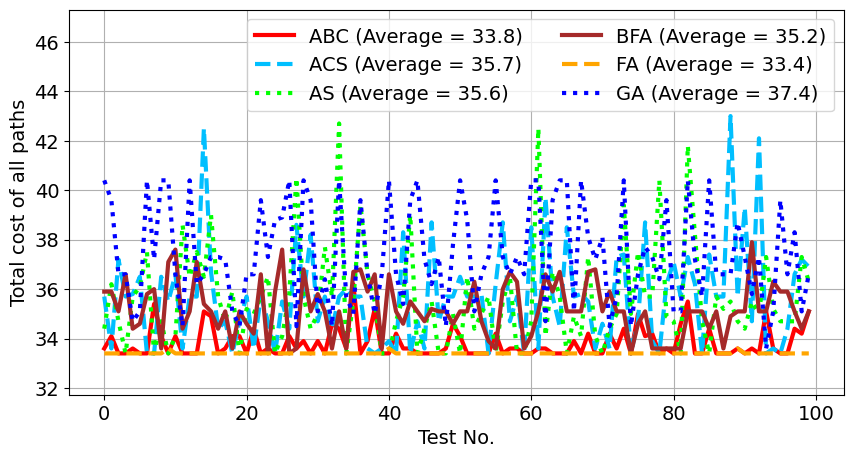

In [22]:
fig = plt.figure(figsize=(10, 5))
avr_1 = round(sum(sum_1)/Times, 1)
avr_2 = round(sum(sum_2)/Times, 1)
avr_3 = round(sum(sum_3)/Times, 1)
avr_4 = round(sum(sum_4)/Times, 1)
avr_5 = round(sum(sum_5)/Times, 1)
avr_6 = round(sum(sum_6)/Times, 1)
plt.ylim(0.95*min(sum_1+sum_2+sum_3+sum_4+sum_5+sum_6), 1.1*max(sum_1+sum_2+sum_3+sum_4+sum_5+sum_6))
plt.plot(sum_1, label = "ABC" + " (Average = "+str(avr_1)+")", linewidth = '3', color='red')
plt.plot(sum_2, label = "ACS" + " (Average = "+str(avr_2)+")", linewidth = '3', color='deepskyblue', linestyle = 'dashed')
plt.plot(sum_3, label = "AS" + " (Average = "+str(avr_3)+")", linewidth = '3', color='lime', linestyle = 'dotted')
plt.plot(sum_4, label = "BFA" + " (Average = "+str(avr_4)+")", linewidth = '3', color='brown')
plt.plot(sum_5, label = "FA" + " (Average = "+str(avr_5)+")", linewidth = '3', color='orange', linestyle = 'dashed')
plt.plot(sum_6, label = "GA" + " (Average = "+str(avr_6)+")", linewidth = '3', color='blue', linestyle = 'dotted')
plt.legend(loc="upper right", ncol=2)
plt.xlabel("Test No.")
plt.ylabel("Total cost of all paths")
plt.grid()
plt.savefig("/content/gdrive/My Drive/SDN/SomePrograms/SDN_PyQt5/ryu_controller/ALL/ALL_sum.png", dpi=200, bbox_inches='tight')

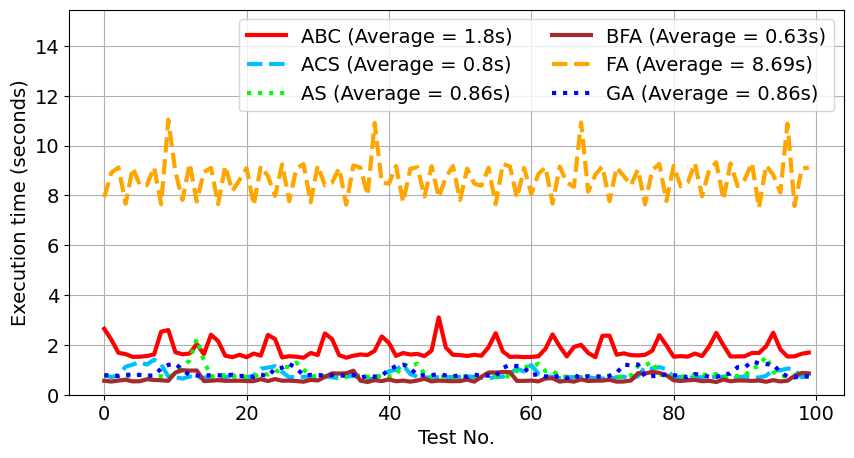

In [24]:
fig = plt.figure(figsize=(10, 5))
avr_1 = round(sum(time_1)/Times, 2)
avr_2 = round(sum(time_2)/Times, 2)
avr_3 = round(sum(time_3)/Times, 2)
avr_4 = round(sum(time_4)/Times, 2)
avr_5 = round(sum(time_5)/Times, 2)
avr_6 = round(sum(time_6)/Times, 2)
plt.ylim(0*min(time_1+time_2+time_3+time_4+time_5+time_6), 1.4*max(time_1+time_2+time_3+time_4+time_5+time_6))
plt.plot(time_1, label = "ABC" + " (Average = "+str(avr_1)+"s)", linewidth = '3', color='red')
plt.plot(time_2, label = "ACS" + " (Average = "+str(avr_2)+"s)", linewidth = '3', color='deepskyblue', linestyle = 'dashed')
plt.plot(time_3, label = "AS" + " (Average = "+str(avr_3)+"s)", linewidth = '3', color='lime', linestyle = 'dotted')
plt.plot(time_4, label = "BFA" + " (Average = "+str(avr_4)+"s)", linewidth = '3', color='brown')
plt.plot(time_5, label = "FA" + " (Average = "+str(avr_5)+"s)", linewidth = '3', color='orange', linestyle = 'dashed')
plt.plot(time_6, label = "GA" + " (Average = "+str(avr_6)+"s)", linewidth = '3', color='blue', linestyle = 'dotted')
plt.legend(loc="upper right", ncol=2)
plt.xlabel("Test No.")
plt.ylabel("Execution time (seconds)")
plt.grid()
plt.savefig("/content/gdrive/My Drive/SDN/SomePrograms/SDN_PyQt5/ryu_controller/ALL/AL_time.png", dpi=200, bbox_inches='tight')